In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_style('whitegrid')

In [4]:
data =  pd.read_csv('atomoxetine.tsv', sep='\t')

In [5]:
data

,sex,group,center_time_sec,sum_corner_time_sec,min_one_corner_time_sec,max_one_corner_time_sec,average_corner_time_sec,open_arms_time_sec,close_arms_time_sec,overall_track_length,...,min_corner_velocity_cms,average_corner_velocity_cms,average_open_arms_velosity_sms,average_close_arms_velocity_sms,overall_activity,center_activity,min_one_corner_activity,max_one_corner_activity,open_arms,close_arms
0,female,pre-stress,32.3,280.5,22.8,125.7,70.10,49.8,225.0,547.0,...,1.3,1.5,1.3,1.8,37.7,56.2,30.9,40.8,37.2,35.9
1,female,pre-stress,47.5,260.7,21.5,112.1,65.20,57.8,202.9,725.4,...,1.9,2.1,1.9,2.3,43.0,65.1,34.1,49.3,45.8,37.6
2,female,pre-stress,40.1,289.1,36.3,114.8,72.30,89.1,200.0,644.4,...,1.8,1.8,1.8,1.9,39.0,49.8,33.9,43.5,42.2,35.4
3,female,pre-stress,43.6,265.3,18.9,118.8,66.30,58.5,206.8,581.7,...,1.6,1.8,1.9,1.8,38.8,53.2,32.1,48.2,45.2,34.6
4,female,pre-stress,31.2,286.0,22.4,140.3,71.50,55.4,230.6,710.3,...,1.8,2.1,2.0,2.3,45.3,60.2,39.0,51.2,46.6,43.9
5,male,pre-stress,41.3,258.7,12.3,156.1,64.70,14.1,230.5,744.0,...,1.7,1.8,2.9,2.9,40.7,56.4,28.6,51.5,36.8,37.5
6,male,pre-stress,51.4,265.1,42.0,118.3,66.30,102.2,161.0,779.0,...,2.0,2.6,2.6,2.6,38.4,41.8,32.0,52.9,38.2,42.5
7,male,pre-stress,38.7,265.0,22.6,126.9,66.25,73.9,191.1,746.9,...,2.0,2.4,2.4,2.4,41.2,54.1,35.4,42.5,37.3,40.9
8,female,post-stress,18.8,284.9,15.1,161.6,71.20,33.8,251.1,718.4,...,1.7,2.9,3.8,2.1,38.2,62.1,30.6,60.5,49.4,36.4
9,female,post-stress,29.9,281.0,14.8,171.4,70.30,32.1,248.6,1098.5,...,2.9,3.9,4.4,3.4,48.2,66.2,42.3,55.5,53.4,47.4


In [6]:
data.sex = data.sex.map(lambda x: x == 'male').astype(int)
data.group = data.group.map(lambda x: x !=data.group.unique()[0]).astype(int)

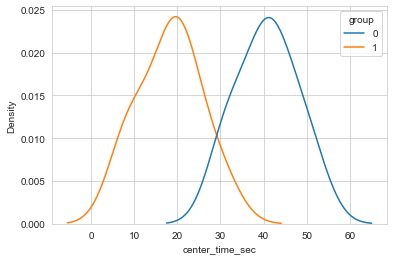

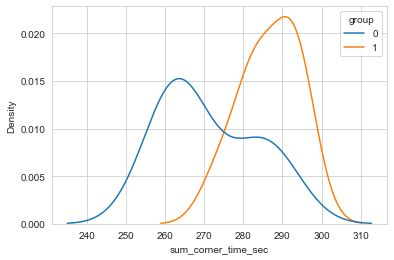

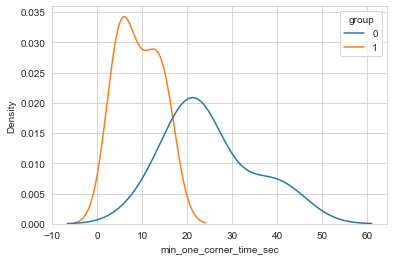

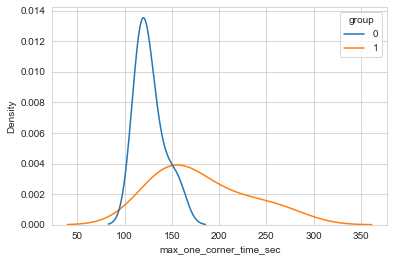

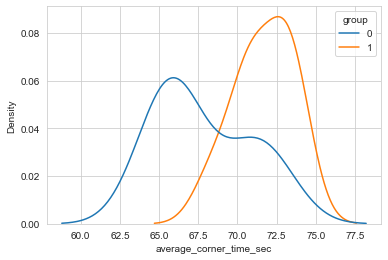

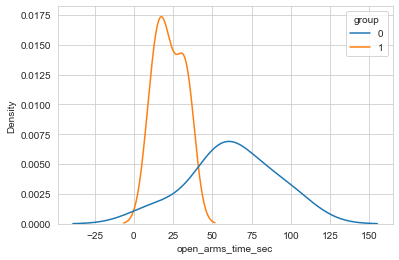

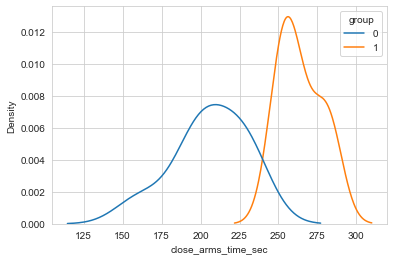

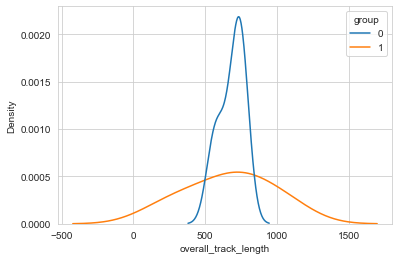

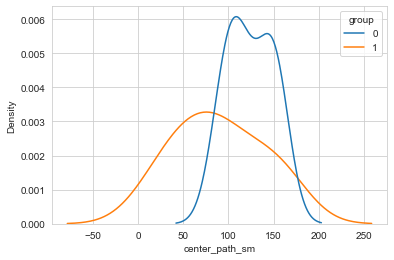

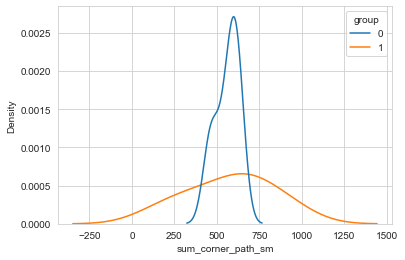

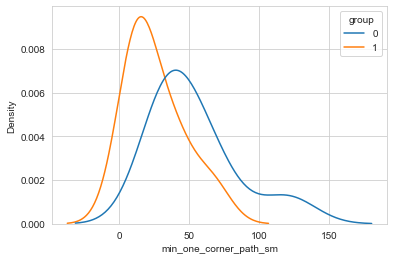

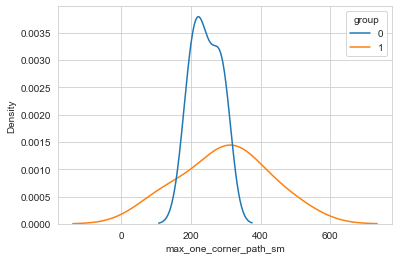

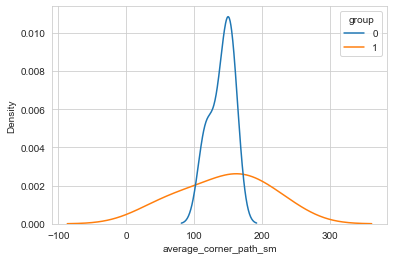

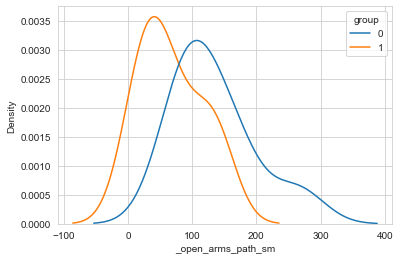

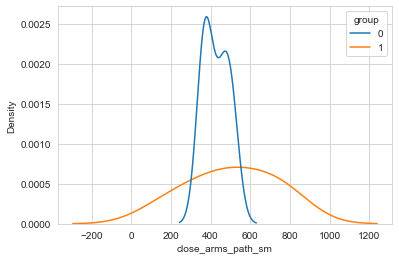

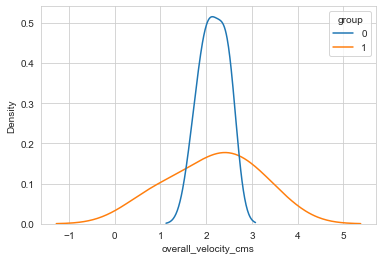

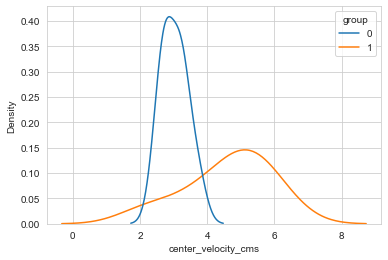

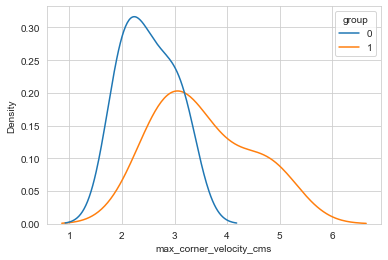

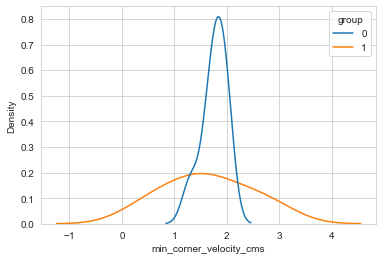

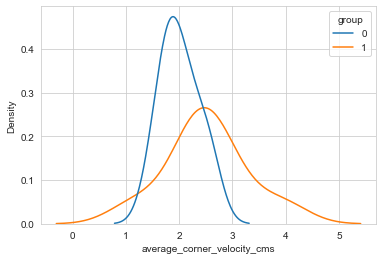

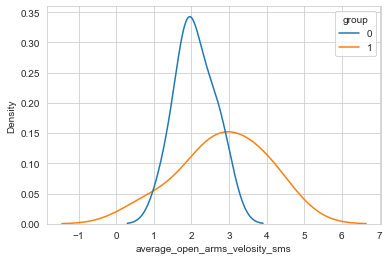

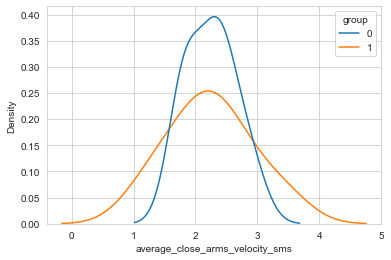

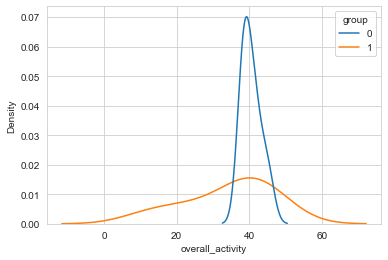

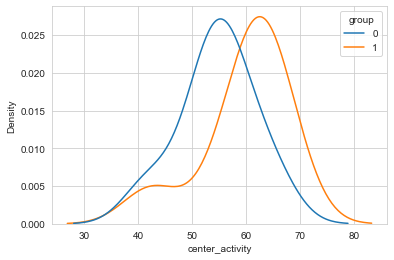

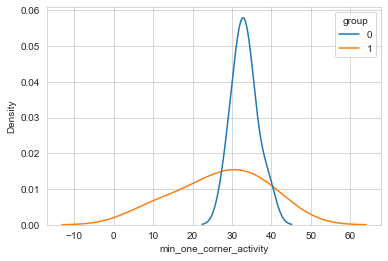

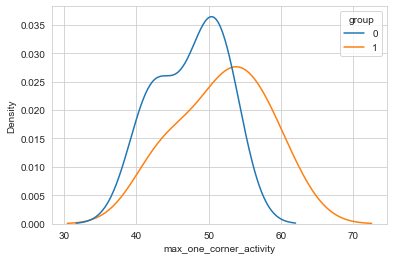

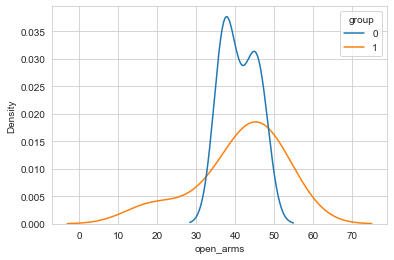

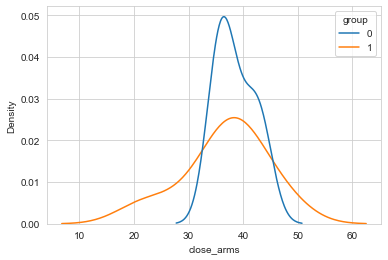

In [23]:
for col in data.columns[2:]:
    sns.kdeplot(x=col, hue='group', data =data)    
    plt.show()

In [8]:
rel_test = [(col, scipy.stats.ttest_rel(data[data.group==0][col], data[data.group==1][col]).pvalue) for col in data.columns[2:]]

Relational t-test:

In [9]:
list(filter(lambda x: x[1] < 0.05, rel_test))

[('center_time_sec', 8.761251337735197e-05),
 ('sum_corner_time_sec', 0.007365778513952491),
 ('min_one_corner_time_sec', 0.0027697186086163466),
 ('max_one_corner_time_sec', 0.003944318010291316),
 ('average_corner_time_sec', 0.0073443261021342325),
 ('open_arms_time_sec', 0.0026594254252168686),
 ('close_arms_time_sec', 9.624047612370432e-05),
 ('_open_arms_path_sm', 0.049142357986928925),
 ('center_velocity_cms', 0.026606213070191065),
 ('max_corner_velocity_cms', 0.03740638177616203)]

---